In [1]:
import joblib

from utils import ROOTDIR

In [2]:
BASE_EXPORT_PATH = ROOTDIR / "models" / "training"

In [3]:
# type: ignore

X_train = joblib.load(BASE_EXPORT_PATH / "X_train.joblib")
X_test = joblib.load(BASE_EXPORT_PATH / "X_test.joblib")
y_train = joblib.load(BASE_EXPORT_PATH / "y_train.joblib")
y_test = joblib.load(BASE_EXPORT_PATH / "y_test.joblib")

In [4]:
le = joblib.load(BASE_EXPORT_PATH / "LabelEncoder.joblib")  # type: ignore

In [5]:
# type: ignore

len(X_train), len(y_train), len(X_test), len(y_test)

(92328, 92328, 24624, 24624)

---

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,  # type: ignore
    confusion_matrix,
)

In [7]:
model = RandomForestClassifier()

In [8]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_pred = model.predict(X_test)

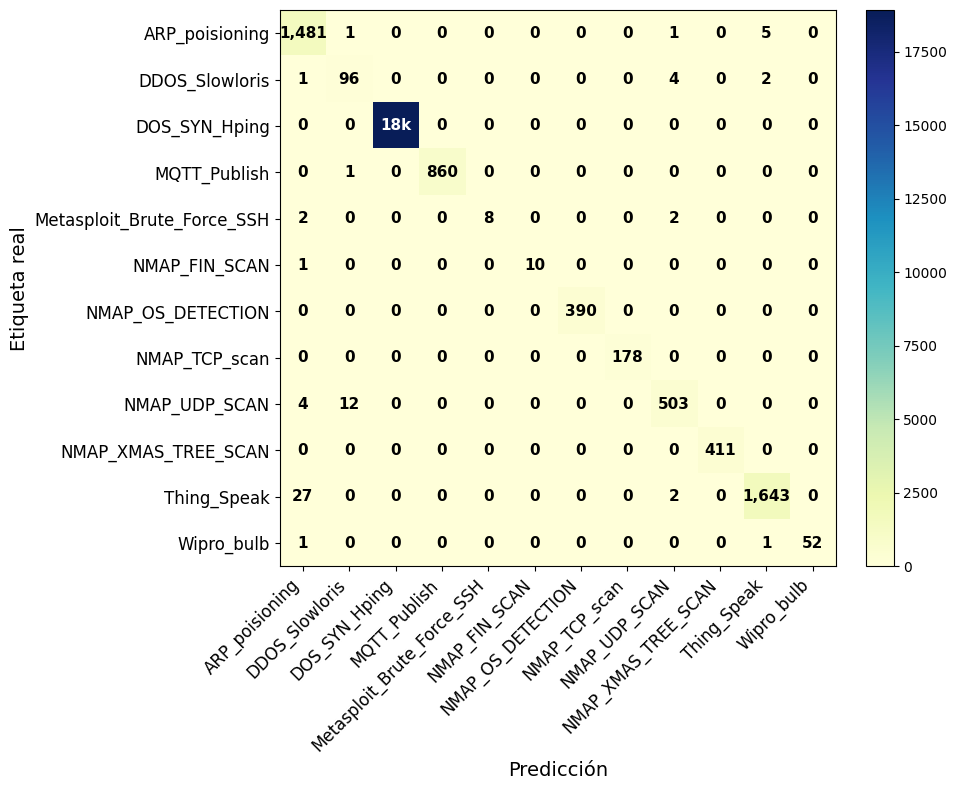

In [13]:
# type: ignore

import numpy as np

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cm, cmap='YlGnBu')

classes = le.classes_
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(classes, fontsize=12)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        value = cm[i, j]
        color = "white" if im.norm(value) > 0.5 else "black"
        display_value = f"{value:,}" if value < 10000 else f"{value//1000}k"
        ax.text(j, i, display_value, ha="center", va="center", color=color, fontsize=11, fontweight='bold')

plt.xlabel("Predicción", fontsize=14)
plt.ylabel("Etiqueta real", fontsize=14)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.savefig(ROOTDIR / "docs" / "Images" / "confusion_matrix__RandomForestClassifier.png", dpi=300)
plt.show()

In [11]:
# type: ignore

feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(10)

56    0.051865
17    0.048133
9     0.042818
40    0.042223
30    0.042196
1     0.041406
15    0.040616
22    0.036093
44    0.035161
24    0.034689
dtype: float64

In [12]:
print(classification_report(y_pred=y_pred, y_true=y_test)) # type: ignore

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1488
           1       0.87      0.93      0.90       103
           2       1.00      1.00      1.00     18925
           3       1.00      1.00      1.00       861
           4       1.00      0.67      0.80        12
           5       1.00      0.91      0.95        11
           6       1.00      1.00      1.00       390
           7       1.00      1.00      1.00       178
           8       0.98      0.97      0.98       519
           9       1.00      1.00      1.00       411
          10       1.00      0.98      0.99      1672
          11       1.00      0.96      0.98        54

    accuracy                           1.00     24624
   macro avg       0.99      0.95      0.97     24624
weighted avg       1.00      1.00      1.00     24624

